In [2]:
import pandas as pd
dataset=pd.read_csv("Preplacementdata.csv")
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,sl_no.1,ssc_p.1,hsc_p.1,degree_p.1,etest_p.1,mba_p.1,salary.1
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,1,67.00,91.00,58.00,55.0,58.80,270000.0
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,2,79.33,78.33,77.48,86.5,66.28,200000.0
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,3,65.00,68.00,64.00,75.0,57.80,250000.0
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,4,56.00,52.00,52.00,66.0,59.43,0.0
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,5,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,211,80.60,82.00,77.60,91.0,74.49,400000.0
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,212,58.00,60.00,72.00,74.0,53.62,275000.0
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,213,67.00,67.00,73.00,59.0,69.72,295000.0
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,214,74.00,66.00,58.00,70.0,60.23,204000.0


In [3]:
dataset.isnull().sum()

sl_no         0
ssc_p         0
hsc_p         0
degree_p      0
etest_p       0
mba_p         0
salary        0
sl_no.1       0
ssc_p.1       0
hsc_p.1       0
degree_p.1    0
etest_p.1     0
mba_p.1       0
salary.1      0
dtype: int64

In [4]:
import seaborn as sns

C:\Users\K Shankar\AppData\Local\Temp\ipykernel_31264\2590864738.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ssc_p"])


<Axes: xlabel='ssc_p', ylabel='Density'>

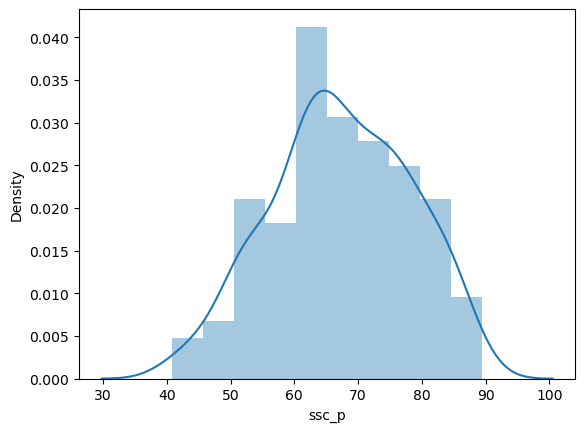

In [5]:
sns.distplot(dataset["ssc_p"])

In [15]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    #generate a sample
    sample = dataset
    #calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    #print('Mean=%.3f, Standard Deviation=%,3f' % (sample_mean, sample_std))
    print('Mean={:,.3f}, Standard Deviation={:,.3f}'.format(sample_mean, sample_std))
    #define the distribution
    dist=norm(sample_mean, sample_std)
    #sample probabilities for a range of outcomes
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

Mean=67.303, Standard Deviation=10.827
The area between range(60,70):0.3449514151280293


C:\Users\K Shankar\AppData\Local\Temp\ipykernel_31264\4074406308.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


0.3449514151280293

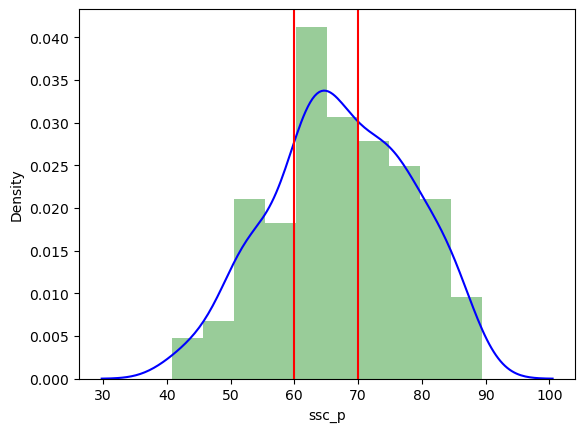

In [17]:
get_pdf_probability(dataset["ssc_p"],60,70)

In [18]:
def stdNBgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[(j-mean)/std for j in values]
    sns.displot(z_score, kde=True)
    sum(z_score)/len(z_score)

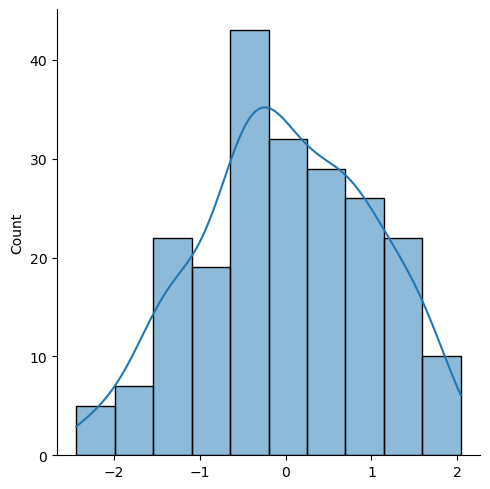

In [19]:
stdNBgraph(dataset["ssc_p"])